In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, kruskal # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical
from scipy.stats import shapiro # Test Gaussian (50 to 200 samples)
from scipy.stats import levene # Test variance
from scipy.stats import ks_2samp

from statsmodels.graphics.gofplots import qqplot

ModuleNotFoundError: No module named 'statsmodels'

# Aerofit

In [ ]:
df_aerofit = pd.read_csv("aerofit.csv")

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<AxesSubplot:xlabel='Product', ylabel='Income'>

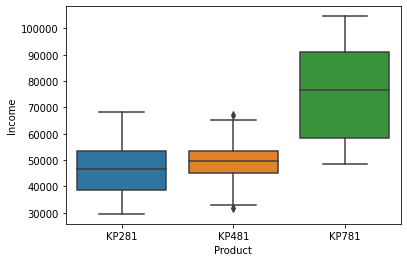

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [ ]:
df_aerofit["random_group"] = np.random.choice(
    ["g1", "g2", "g3"], 
    size=len(df_aerofit)
)

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g2
1,KP281,19,Male,15,Single,2,3,31836,75,g2
2,KP281,19,Female,14,Partnered,4,3,30699,66,g1
3,KP281,19,Male,12,Single,3,3,32973,85,g1
4,KP281,20,Male,13,Partnered,4,2,35247,47,g3


<AxesSubplot:xlabel='random_group', ylabel='Income'>

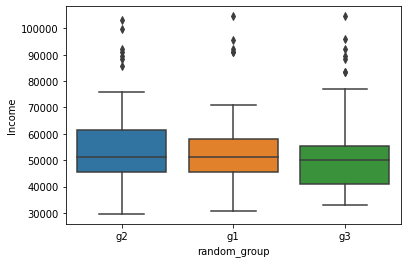

In [ ]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

In [ ]:
income_g1 = df_aerofit[df_aerofit["random_group"]=="g1"]["Income"]
income_g2 = df_aerofit[df_aerofit["random_group"]=="g2"]["Income"]
income_g3 = df_aerofit[df_aerofit["random_group"]=="g3"]["Income"]

In [ ]:
income_g1.mean()

53622.07272727273

In [ ]:
income_g2.mean()

54442.907692307694

In [ ]:
income_g3.mean()

53025.35

In [ ]:
# H0: All groups have same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


<AxesSubplot:xlabel='Product', ylabel='Income'>

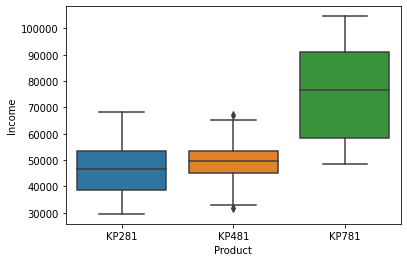

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [ ]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [ ]:
income_kp281.mean()

46418.025

In [ ]:
income_kp481.mean()

48973.65

In [ ]:
income_kp781.mean()

75441.575

In [ ]:
# H0: All groups have same mean
f_oneway(income_kp281, income_kp481, income_kp781)

# p_value is almost 0, so reject H0

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

In [ ]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp281, income_kp481)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


In [ ]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp481, income_kp781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

7.770191623361236e-16
Reject H0


In [ ]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp281, income_kp781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

4.116508528877672e-21
Reject H0


# Assumptions of ANOVA

1. Gaussian
2. Independent
3. Equal variance

In [ ]:
# If assumptions of ANOVA fail, use kruskal
kruskal(income_kp281, income_kp481, income_kp781)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

In [ ]:
kruskal(income_g1, income_g2, income_g3)

KruskalResult(statistic=0.6871002053436382, pvalue=0.7092479450371747)

In [ ]:
df_hw = pd.read_csv("weight-height.csv")

In [ ]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
height = df_hw["Height"]

<AxesSubplot:xlabel='Height', ylabel='Count'>

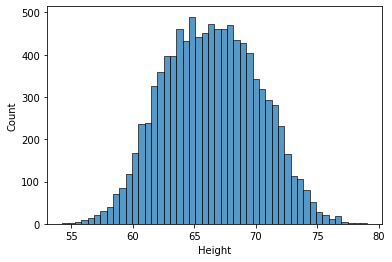

In [ ]:
sns.histplot(height)

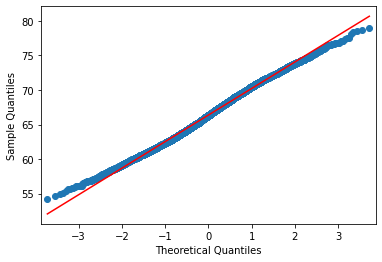

In [ ]:
qqplot(height, line="s")
plt.show()

In [ ]:
df_wt = pd.read_csv("waiting_time.csv")

In [ ]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<AxesSubplot:xlabel='time', ylabel='Count'>

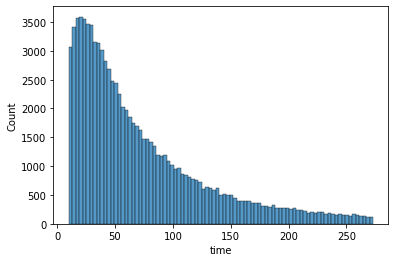

In [ ]:
sns.histplot(df_wt["time"])

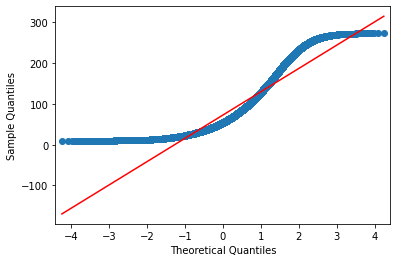

In [ ]:
qqplot(df_wt["time"], line="s")
plt.show()

## Shapiro test for Gaussian


Take a few samples of data (50 to 200)
This test may not work if data is too large

In [ ]:
height_subset = height.sample(100)

In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(height_subset)
print(p_value)

0.5423843264579773


In [ ]:
df_wt_subset = df_wt.sample(50)["time"]

In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(df_wt_subset)
print(p_value)

2.5150446163024753e-05


<AxesSubplot:xlabel='Height', ylabel='Count'>

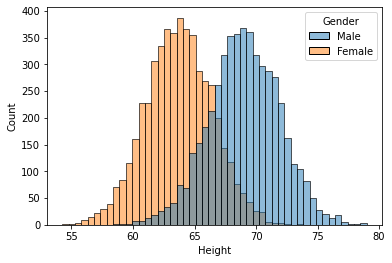

In [ ]:
sns.histplot(data=df_hw, x="Height", hue="Gender")

In [ ]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [ ]:
height_men.mean()

69.02634590621741

In [ ]:
height_women.mean()

63.70877360342507

In [ ]:
ttest_ind(height_men, height_women)

Ttest_indResult(statistic=95.60271449148823, pvalue=0.0)

In [ ]:
height_men.var()

8.198843252520467

In [ ]:
height_women.var()

7.2699474936701245

To establish whether this difference we see in variance is chance or significant, we have to use Levene test

In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(height_men, height_women)
if p_value < 0.05:
    print("Variances are not equal")

Variances are not equal


# Optional Post read - ANOVA implementation 

Suppose we have monthly iPhone sales from three stores in a city: a, b, c.

Test whether they have the same average sales

In [ ]:
a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]

In [ ]:
f_stat, p_value = f_oneway(a,b,c) 
print(f_stat, p_value)

0.2348993288590604 0.793504662732833


In [ ]:
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


In [ ]:
m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print('Average sales for A: {}'.format(m1))
print('Average sales for B: {}'.format(m2))
print('Average sales for C: {}'.format(m3))

Average sales for A: 25.0
Average sales for B: 26.5
Average sales for C: 26.0


In [ ]:
m = (m1+m2+m3)/3 
print('Overall mean: {}'.format(m)) 

Overall mean: 25.833333333333332


In [ ]:
SSb = 6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


In [ ]:
MSb = SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [ ]:
err_a = list(a-m1)
err_b = list(b-m2)
err_c = list(c-m3)
err = err_a+err_b+err_c
ssw = []
for i in err:
    ssw.append(i**2)
    
SSw = np.sum(ssw)

In [ ]:
MSw = SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


In [ ]:
F = MSb/MSw
print('F-score: {}'.format(F))

F-score: 0.23489932885906037


In [5]:
1 - F.cdf(F, dfn=2, dfd=15)

NameError: name 'F' is not defined

In [ ]:
f_stat, p_value = f_oneway(a,b,c) 
print(f_stat, p_value)

In [ ]:
# If assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal(a, b, c)